In [1]:
import sys
sys.path.append('../../')
import torch
import torch.nn as nn
import torch.optim as optim
from Code.envs.GPEnv import MultiEnv
from wip.Code.train_ac import make_dataset, backward_one
import time
from collections import OrderedDict
from wip.Code import oldGP



In [2]:

BATCH_SIZE = 512#64
SIM_TIME = 1
MAX_ITER = 10
USE_JIT = False

device = torch.device('cuda')

env = MultiEnv(BATCH_SIZE, MAX_ITER, device)

#torch.backends.cudnn.enabled = False



In [3]:
myenv = MultiEnv(2, 20, device)
oldenv = oldGP.MultiEnv(2, 20, device)

In [4]:
torch.manual_seed(1)
myenv.reset()
myenv.step(torch.tensor([0.5, 0.6], device=device))

(tensor([[ 0.5000, -0.5813],
         [ 0.6000, -1.0216]], device='cuda:0'), tensor([[0.0527],
         [0.0000]], device='cuda:0'), tensor([[ 2.4299e-07, -3.1252e-04],
         [ 5.7989e-15, -4.8975e-08]], device='cuda:0'))

In [5]:
torch.manual_seed(1)
oldenv.reset()
oldenv.step(torch.tensor([0.5, 0.6], device=device))

#%


tensor([[4.9295e-04],
        [7.6151e-08]], device='cuda:0')


(tensor([[ 0.5000, -0.5813],
         [ 0.6000, -1.0216]], device='cuda:0'), tensor([[0.0527],
         [0.0000]], device='cuda:0'), tensor([[ 2.4299e-07, -3.1252e-04],
         [ 5.7989e-15, -4.8974e-08]], device='cuda:0'))

In [6]:
myenv.step(torch.tensor([0.7, 0.8], device=device))


(tensor([[ 0.7000, -0.0204],
         [ 0.8000, -1.4111]], device='cuda:0'), tensor([[0.5609],
         [0.0000]], device='cuda:0'), tensor([[ 0.0451, -0.1823],
         [ 0.0183, -0.1383]], device='cuda:0'))

In [7]:
oldenv.step(torch.tensor([0.7, 0.8], device=device))


tensor([[1.6367e-01, 1.3534e-01],
        [1.0965e-13, 1.3534e-01]], device='cuda:0')


(tensor([[ 0.7000, -1.5465],
         [ 0.8000, -1.2057]], device='cuda:0'), tensor([[0.],
         [0.]], device='cuda:0'), tensor([[ 0.0451, -0.1823],
         [ 0.0183, -0.1383]], device='cuda:0'))

In [8]:
myenv.step(torch.tensor([1, 1], device=device))

(tensor([[ 1.0000,  0.9129],
         [ 1.0000, -1.4455]], device='cuda:0'), tensor([[0.9333],
         [0.0000]], device='cuda:0'), tensor([[ 0.3063, -0.3603],
         [ 0.0186, -0.1758]], device='cuda:0'))

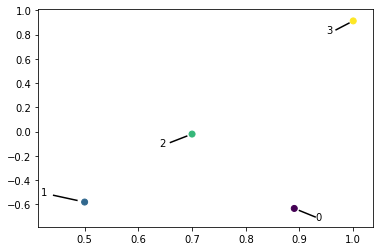

In [9]:
myenv.render()

In [10]:
testenv = MultiEnv(1, 50, device)

In [14]:
testenv.reset()
for i in range(50):
    testenv.step(torch.tensor([i/50], device=device))

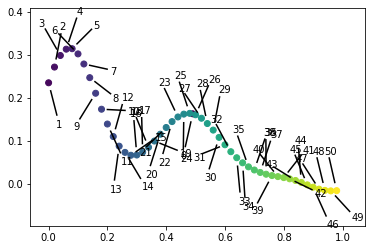

In [15]:
testenv.render()

In [13]:
testenv.data

tensor([[[ 0.4454,  0.2457],
         [ 0.0000, -0.2988],
         [ 0.0200, -0.3507],
         [ 0.0400, -0.3887],
         [ 0.0600, -0.4088],
         [ 0.0800, -0.4092],
         [ 0.1000, -0.3907],
         [ 0.1200, -0.3565],
         [ 0.1400, -0.3108],
         [ 0.1600, -0.2588],
         [ 0.1800, -0.2051],
         [ 0.2000, -0.1532],
         [ 0.2200, -0.1051],
         [ 0.2400, -0.0616],
         [ 0.2600, -0.0217],
         [ 0.2800,  0.0155],
         [ 0.3000,  0.0517],
         [ 0.3200,  0.0874],
         [ 0.3400,  0.1230],
         [ 0.3600,  0.1574],
         [ 0.3800,  0.1890],
         [ 0.4000,  0.2156],
         [ 0.4200,  0.2348],
         [ 0.4400,  0.2448],
         [ 0.4600,  0.2443],
         [ 0.4800,  0.2336],
         [ 0.5000,  0.2138],
         [ 0.5200,  0.1870],
         [ 0.5400,  0.1565],
         [ 0.5600,  0.1248],
         [ 0.5800,  0.0947],
         [ 0.6000,  0.0682],
         [ 0.6200,  0.0463],
         [ 0.6400,  0.0292],
         [ 0.6